In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv("sonar.all-data", names=list(range(1,61)) + ["target"], index_col=False)

In [3]:
df["target"] = df["target"].map({"R":0, "M":1})

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

In [5]:
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=10)
train_ind, test_ind = next(strat_split.split(df.drop(labels=["target"], axis=1), df["target"]))
X_train = df.iloc[train_ind].drop(labels=['target'], axis=1)
y_train = df.iloc[train_ind]["target"]
X_test = df.iloc[test_ind].drop(labels=['target'], axis=1)
y_test = df.iloc[test_ind]["target"]

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [8]:
def print_confusion(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    print(tn, fn)
    print(fp, tp)

## Logistic  Regression


In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
log_reg = LogisticRegression(penalty='l2')
log_reg = log_reg.fit(X_train_std, y_train)

In [11]:
y_preds_reg = log_reg.predict(X_test_std)

In [12]:
print_confusion(y_test, y_preds_reg)

11 6
8 15


In [13]:
print(classification_report(y_test, y_preds_reg))

              precision    recall  f1-score   support

           0       0.65      0.58      0.61        19
           1       0.65      0.71      0.68        21

    accuracy                           0.65        40
   macro avg       0.65      0.65      0.65        40
weighted avg       0.65      0.65      0.65        40



## Logistic Regression with Polynomial Features

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_scaler = StandardScaler()
X_train_poly_std = poly_scaler.fit_transform(X_train_poly)
X_test_poly_std = poly_scaler.transform(X_test_poly)

In [16]:
poly_log_reg = LogisticRegression(penalty='l2')
poly_log_reg = poly_log_reg.fit(X_train_poly, y_train)

In [17]:
y_preds_poly_reg = poly_log_reg.predict(X_test_poly_std)

In [20]:
print_confusion(y_test, y_preds_poly_reg)

18 11
1 10


In [21]:
print(classification_report(y_test, y_preds_poly_reg))

              precision    recall  f1-score   support

           0       0.62      0.95      0.75        19
           1       0.91      0.48      0.62        21

    accuracy                           0.70        40
   macro avg       0.76      0.71      0.69        40
weighted avg       0.77      0.70      0.68        40



## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dec_tree = DecisionTreeClassifier()
dec_tree = dec_tree.fit(X_train, y_train)

In [24]:
y_preds_tree = dec_tree.predict(X_test)

In [26]:
print_confusion(y_test, y_preds_tree)

13 7
6 14


In [27]:
print(classification_report(y_test, y_preds_tree))

              precision    recall  f1-score   support

           0       0.65      0.68      0.67        19
           1       0.70      0.67      0.68        21

    accuracy                           0.68        40
   macro avg       0.68      0.68      0.67        40
weighted avg       0.68      0.68      0.68        40



## Decision Forest


In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
forest = RandomForestClassifier(n_estimators=1000, min_samples_split=5)

In [30]:
forest = forest.fit(X_train, y_train)

In [31]:
y_preds_forest = forest.predict(X_test)

In [32]:
print_confusion(y_test, y_preds_forest)

14 3
5 18


In [33]:
print(classification_report(y_test, y_preds_forest))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        19
           1       0.78      0.86      0.82        21

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40



## Neural Network

In [34]:
import tensorflow as tf
from tensorflow import keras
import tensorboard

In [40]:
deep_model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train_std.shape[1]),
    keras.layers.Dense(100, activation="relu",  kernel_regularizer='l2'),
    keras.layers.Dense(100, activation="relu",  kernel_regularizer='l2'),
    keras.layers.Dense(100, activation="relu", kernel_regularizer='l2'),
    keras.layers.Dense(1, activation="sigmoid")
])

In [41]:
deep_model.compile("nadam", loss = keras.losses.binary_crossentropy, metrics=["accuracy"])

In [42]:
early_stop_cb = keras.callbacks.EarlyStopping(restore_best_weights=True, patience=10, verbose=2)
plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5)

In [43]:
deep_history = deep_model.fit(X_train_std, y_train, epochs=300, callbacks=[early_stop_cb, plateau_cb], validation_split=0.15)

Epoch 1/300
5/5 [==============================] - 1s 58ms/step - loss: 3.4257 - accuracy: 0.5775 - val_loss: 3.3439 - val_accuracy: 0.5385
Epoch 2/300
5/5 [==============================] - 0s 13ms/step - loss: 3.2272 - accuracy: 0.7665 - val_loss: 3.2080 - val_accuracy: 0.5385
Epoch 3/300
5/5 [==============================] - 0s 13ms/step - loss: 3.0670 - accuracy: 0.8219 - val_loss: 3.0818 - val_accuracy: 0.6923
Epoch 4/300
5/5 [==============================] - 0s 15ms/step - loss: 2.9135 - accuracy: 0.8504 - val_loss: 2.9351 - val_accuracy: 0.7692
Epoch 5/300
5/5 [==============================] - 0s 15ms/step - loss: 2.7224 - accuracy: 0.9012 - val_loss: 2.7700 - val_accuracy: 0.8077
Epoch 6/300
5/5 [==============================] - 0s 15ms/step - loss: 2.5725 - accuracy: 0.9327 - val_loss: 2.6359 - val_accuracy: 0.8077
Epoch 7/300
5/5 [==============================] - 0s 15ms/step - loss: 2.4198 - accuracy: 0.9552 - val_loss: 2.5163 - val_accuracy: 0.8077
Epoch 8/300
5/5 [===

In [48]:
deep_model.evaluate(X_test_std, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.6637 - accuracy: 0.8000


[0.6637078523635864, 0.800000011920929]

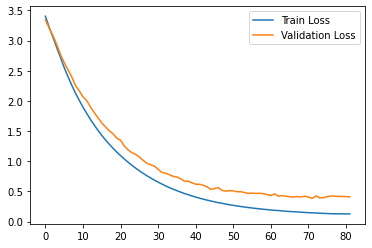

In [47]:
plt.plot(deep_history.history['loss'], label="Train Loss")
plt.plot(deep_history.history['val_loss'], label="Validation Loss")
plt.legend()
plt.savefig("loss.png", dpi=500)
# deep_history.history

In [49]:
y_preds_deep = deep_model.predict_classes(X_test_std)

/home/nimahsn/anaconda3/envs/ml-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [50]:
print_confusion(y_test, y_preds_deep)

14 3
5 18


In [51]:
print(classification_report(y_test, y_preds_deep))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        19
           1       0.78      0.86      0.82        21

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40

